<a href="https://colab.research.google.com/github/P4lms/EDA_Spotify/blob/main/EDA_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotecas

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_json('/content/StreamingHistory0.json')
df1 = pd.read_json('/content/StreamingHistory1.json')
df2 = pd.read_json('/content/StreamingHistory2.json')

In [3]:
df_list = [df, df1, df2]
mdf = pd.concat(df_list)

In [4]:
mdf.head()

,endTime,artistName,trackName,msPlayed
0,2019-12-31 13:23,Breaking Benjamin,Tourniquet,220435
1,2020-01-01 15:50,Gunther & the Sunshine Girls,Ding Dong Song - Radio Edit,130441
2,2020-01-01 15:51,WILLOW,Whip My Hair,26573
3,2020-01-01 16:02,The Lonely Island,Jizz In My Pants,47280
4,2020-01-03 01:15,Breaking Benjamin,Intro,2280


In [5]:
print(f'A junção dos arquivos contém {mdf.shape[0]} linhas e {mdf.shape[1]} colunas')

A junção dos arquivos contém 20202 linhas e 4 colunas


# Tratamento de erros

In [6]:
mdf.isna()

,endTime,artistName,trackName,msPlayed
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
197,False,False,False,False
198,False,False,False,False
199,False,False,False,False
200,False,False,False,False


 Aparantemente não existe nenhuma linha com falta de dados então vamos começar a análise


* Qual é o período de tempo do começo até o fim do arquivo?

* Qual a banda mais ouvida nesse período?

* Qual a música mais ouvida?

* Tempo ouvindo música ao longo do período

1. # Qual é o período de tempo do começo até o fim do arquivo?

In [7]:
mdf['endTime']

0      2019-12-31 13:23
1      2020-01-01 15:50
2      2020-01-01 15:51
3      2020-01-01 16:02
4      2020-01-03 01:15
             ...       
197    2020-12-31 05:17
198    2020-12-31 05:22
199    2020-12-31 05:26
200    2020-12-31 05:31
201    2020-12-31 05:35
Name: endTime, Length: 20202, dtype: object

O período começa em 31 de Dezembro de 2019 e termina em 31 de Dezembro de 2020.

2. # Qual a banda mais ouvida nesse período?

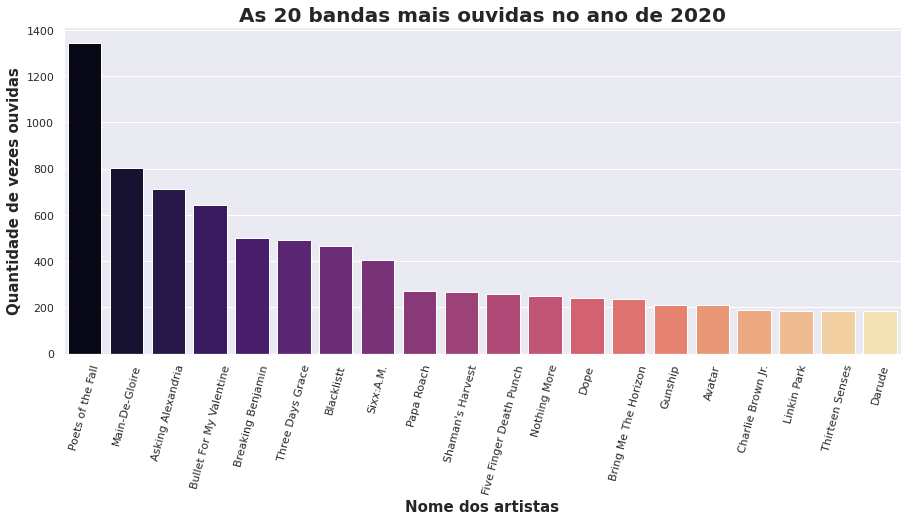

In [10]:
plt.figure(figsize=(15,6))
sns.countplot(mdf['artistName'], order = mdf['artistName'].value_counts().head(20).index, palette='magma')
plt.title('As 20 bandas mais ouvidas no ano de 2020', fontsize=20, fontweight='bold')
plt.ylabel('Quantidade de vezes ouvidas', fontsize=15, fontweight='bold')
plt.xlabel('Nome dos artistas', fontsize=15, fontweight='bold')
plt.xticks(rotation=75)
plt.show()

3. #  Qual a música mais ouvida?

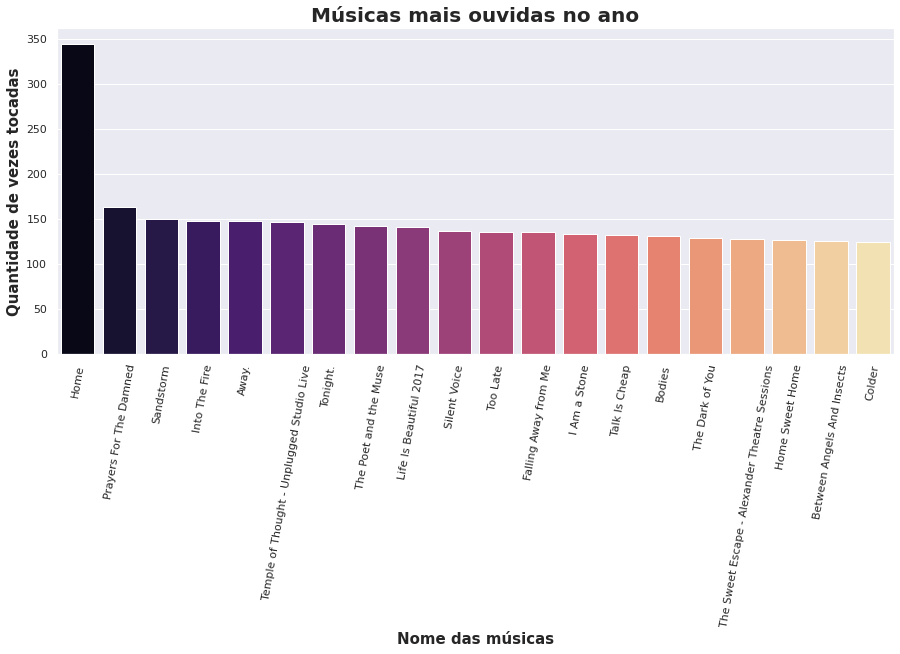

In [11]:
plt.figure(figsize=(15,6))
sns.countplot(mdf['trackName'], order = mdf['trackName'].value_counts().head(20).index, palette='magma')
plt.title('Músicas mais ouvidas no ano', fontsize=20, fontweight='bold')
plt.ylabel('Quantidade de vezes tocadas', fontsize=15, fontweight='bold')
plt.xlabel('Nome das músicas', fontsize=15, fontweight='bold')
plt.xticks(rotation=80)
plt.show()

3. # Quanto tempo eu passei ouvindo  música ao longo do ano?

In [12]:
convert = mdf['msPlayed'].apply(lambda ms: ms / 60000)
soma = convert.sum()
hora = soma // 60
dia = hora // 24

yearhr = 365 * 24

labels = ['Horas ouvidas', 'Horas total no ano']
piedata = [hora, yearhr]

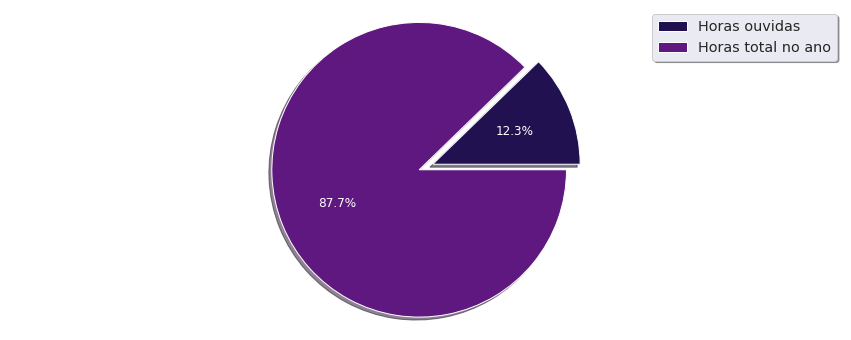

In [13]:
from matplotlib import gridspec

fig = plt.figure(figsize=(15,6))
gs = gridspec.GridSpec(nrows=1, ncols=1, height_ratios=[6], width_ratios=[10])

ax = plt.subplot(gs[0])
plt.pie(piedata, explode=[0.1,0], autopct='%1.1f%%', shadow=True,
        colors=sns.color_palette('magma'),
        textprops=dict(color='w'))
ax.legend(labels, shadow=True, fontsize='large', loc=0)

ax.axis('equal')
plt.show()
